<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/cv/Training Dataset

/content/drive/MyDrive/cv/Training Dataset


In [3]:
%ls

Fire/  NoFire/


In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [5]:
DATADIR = '/content/drive/MyDrive/cv/Training Dataset'
CATEGORIES = ['Fire', 'NoFire']

In [6]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [7]:
training_data = create_training_data()


100%|██████████| 1301/1301 [00:40<00:00, 32.35it/s]


In [8]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2423
1
1
0
0
0
1
0
1
1
0


In [9]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]
Y = np.array (Y)
#Y = Y/255.0

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [12]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)

Epoch 1/100
53/53 [==============================] - 12s 13ms/step - loss: 0.5911 - accuracy: 0.6958 - val_loss: 0.5184 - val_accuracy: 0.7469
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 0.5118 - accuracy: 0.7659 - val_loss: 0.5109 - val_accuracy: 0.7442
Epoch 3/100
53/53 [==============================] - 0s 8ms/step - loss: 0.4880 - accuracy: 0.7665 - val_loss: 0.4512 - val_accuracy: 0.7909
Epoch 4/100
53/53 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.7730 - val_loss: 0.4424 - val_accuracy: 0.8019
Epoch 5/100
53/53 [==============================] - 0s 6ms/step - loss: 0.4246 - accuracy: 0.8019 - val_loss: 0.4550 - val_accuracy: 0.7662
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4020 - accuracy: 0.8208 - val_loss: 0.3935 - val_accuracy: 0.8171
Epoch 7/100
53/53 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.8361 - val_loss: 0.3940 - val_accuracy: 0.8239
Epoch 8/100

In [13]:
model.save('TrainedModels/Fire-64x64-color-v7.1-soft.h5')

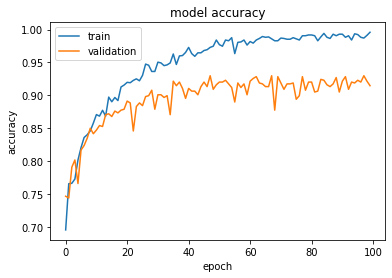

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

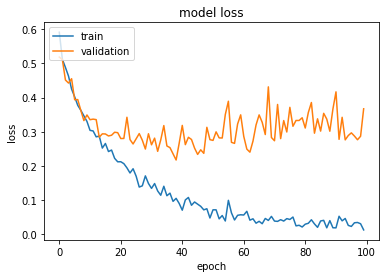

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()